In [912]:

%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Add the Functions folder to Python path
sys.path.append("../Functions")  # adjust if needed

from functions import filter_data, plot_indicator

#https://docs.google.com/spreadsheets/d/1BJYCRpalLJLO5wHX488KBdcf-26NAc0nTkngKodzUYA/export?format=csv
df_url = "https://docs.google.com/spreadsheets/d/1E0lyCSxlC0ajNtzjpWo17TX5DEeEjd33E-j6c7fOBcg/export?format=csv"
df = pd.read_csv(df_url)
df.columns = [c.strip() for c in df.columns]

In [913]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [914]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


/var/folders/cc/3rg_c9bd0_3_5zr4j400w21m0000gn/T/ipykernel_39767/1348124582.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



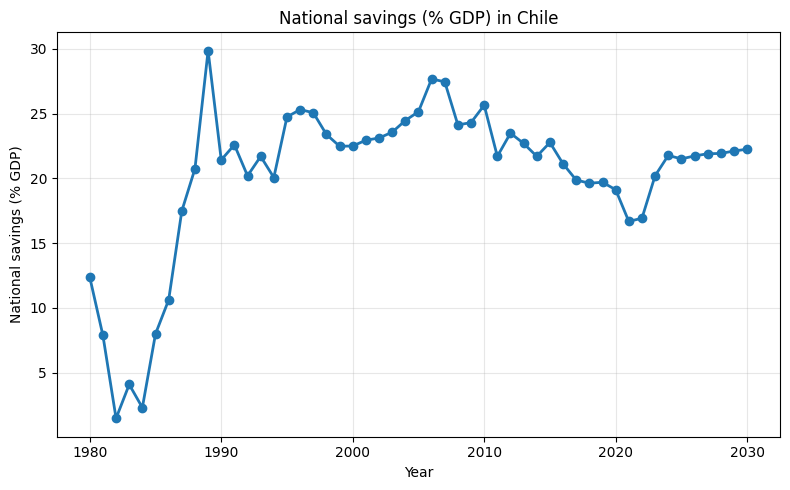

In [915]:
df_chile_savings = filter_data(df, "Chile", "National savings (% GDP)")
fig = plot_indicator(df_chile_savings, "Chile", "National savings (% GDP)")
fig.show()

In [916]:
def plot_indicator_bar(df_filtered, country, indicator):
    """
    Creates a bar chart from a filtered dataframe.
    Returns a Matplotlib figure object.
    Works in both Jupyter and Streamlit.
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    if df_filtered.empty:
        ax.text(0.5, 0.5, "No data available",
                ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        return fig

    # --- KEY CHANGE: Use ax.bar() instead of ax.plot() ---
    ax.bar(df_filtered["Year"], df_filtered["Value"], color='skyblue', edgecolor='black')
    
    # Optional: Rotate x-axis labels for better readability if years are crowded
    ax.set_xticks(df_filtered["Year"]) # Ensure ticks are only on the years available
    ax.tick_params(axis='x', rotation=45) 
    # --- END KEY CHANGE ---

    ax.set_title(f"{indicator} in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel(indicator)
    ax.grid(axis='y', alpha=0.3) # Typically bar charts only need horizontal grid lines

    plt.tight_layout()
    return fig

In [917]:
df_GDP = df[df["Indicator Name"].str.contains("GDP per capita", case=False, na=False)]

#df_GDP = df[df["Indicator Name"]== "GDP per capita"]
df_GDP.head(29)

,Country Name,Indicator Name,Year,Value
2,United States,GDP per capita,1980,12552.943
6,Denmark,GDP per capita,1980,13824.640
7,Germany,GDP per capita,1980,11150.445
13,Japan,GDP per capita,1980,9671.861
20,South Africa,GDP per capita,1980,3074.684
23,Costa Rica,GDP per capita,1980,2108.750
24,Chile,GDP per capita,1980,2598.159
31,Indonesia,GDP per capita,1980,673.239
33,Ghana,GDP per capita,1980,3239.454
36,Poland,GDP per capita,1980,1600.046


In [918]:
df["Indicator Name"].unique()

array(['National savings (% GDP)', 'Unemployment levels (%)',
       'GDP per capita', 'Inflation (CPI, %))',
       'Urban population (% of total population)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Current health expenditure (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Birth rate, crude (per 1,000 people)'], dtype=object)

In [919]:
df["Country Name"].unique()

array(['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana', 'Poland', 'China',
       "Cote d'Ivoire"], dtype=object)

In [920]:
all_countries=['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland']

In [921]:
def plot_two_indicators_2000_2023(df, countries, ind1, ind2):
    # Filter for selected countries and indicators
    df_f = df[df["Country Name"].isin(countries) & 
              df["Indicator Name"].isin([ind1, ind2])]

    # Split by indicator
    df1 = df_f[df_f["Indicator Name"] == ind1]
    df2 = df_f[df_f["Indicator Name"] == ind2]

    # Pivot for plotting
    df1_pivot = df1.pivot(index="Year", columns="Country Name", values="Value")
    df2_pivot = df2.pivot(index="Year", columns="Country Name", values="Value")

    # Align all years across both indicators
    all_years = sorted(set(df1_pivot.index).union(df2_pivot.index))
    df1_pivot = df1_pivot.reindex(all_years)
    df2_pivot = df2_pivot.reindex(all_years)

    # 🔹 Limit to 2000-2023
    df1_pivot = df1_pivot.loc[2000:2023]
    df2_pivot = df2_pivot.loc[2000:2023]

    # Figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map (one color per country)
    colors = plt.cm.tab10.colors

    # Plot indicator 1 (solid)
    handles = []
    for i, country in enumerate(countries):
        if country in df1_pivot.columns:
            line, = ax1.plot(
                df1_pivot.index, df1_pivot[country],
                color=colors[i % len(colors)],
                linewidth=2
            )
            handles.append(line)

    ax1.set_ylabel(ind1)
    ax1.set_xlabel("Year")
    ax1.grid(True, linestyle='--', alpha=0.4)

    # Plot indicator 2 (dashed, same color per country)
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        if country in df2_pivot.columns:
            ax2.plot(
                df2_pivot.index, df2_pivot[country],
                color=colors[i % len(colors)],
                linestyle="--",
                linewidth=2
            )

    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15, 1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (2000-2023)")
    plt.tight_layout()
    plt.show()



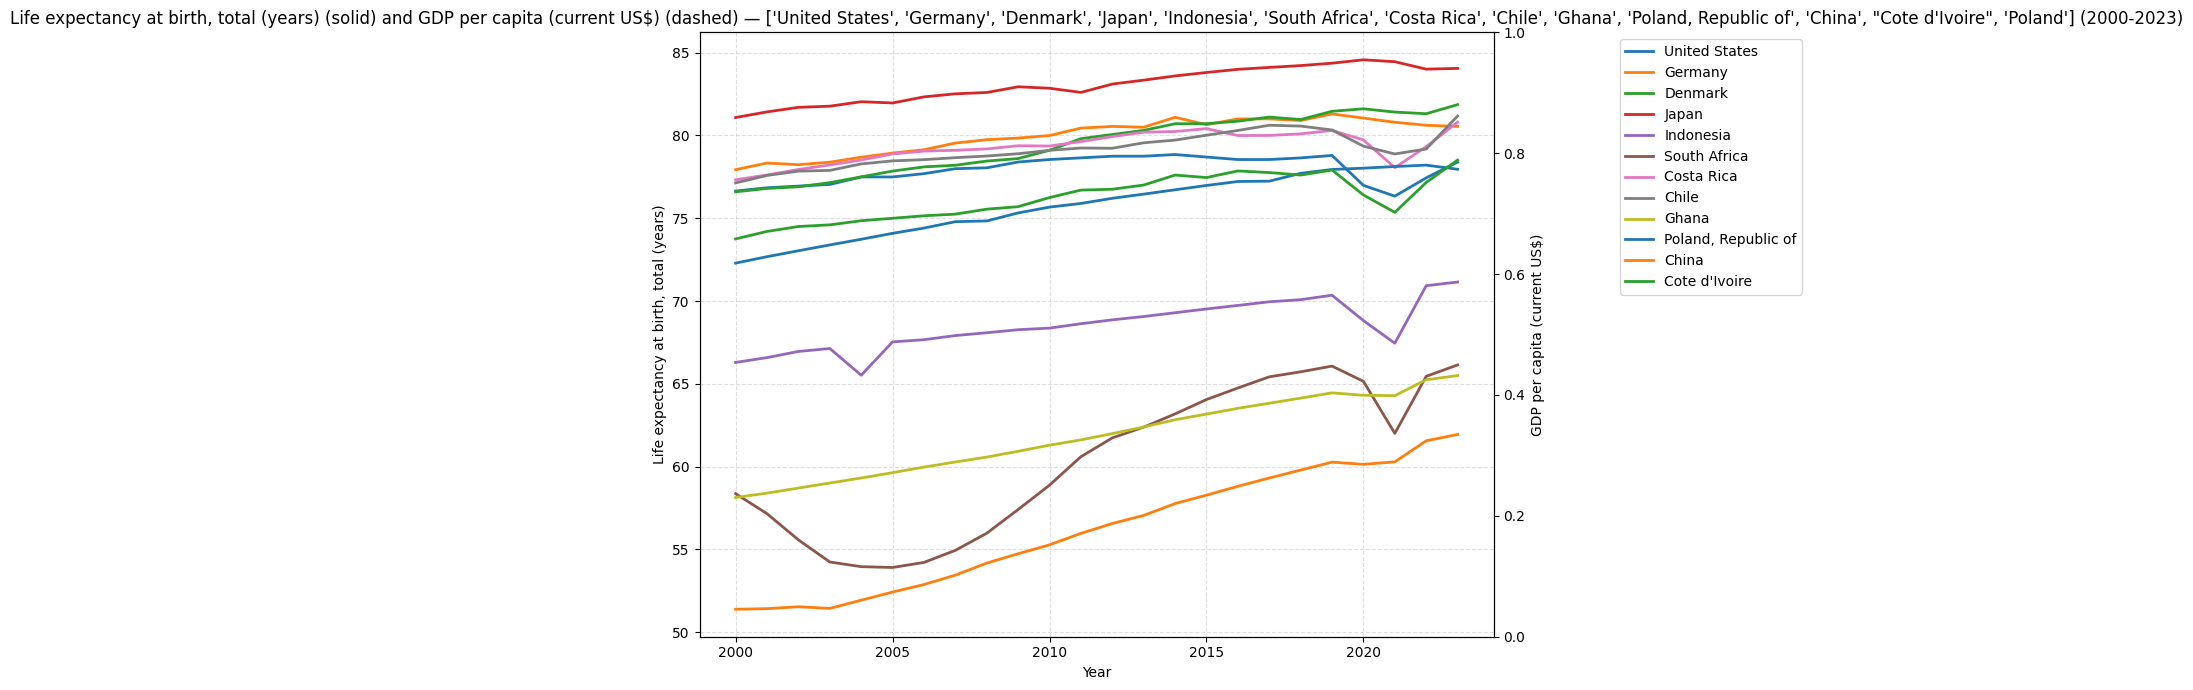

In [922]:
countries_Europe = ["Poland", "Germany", "Denmark"]
countries_America = ["United States", "Costa Rica", "Chile"]

ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita (current US$)"

plot_two_indicators_2000_2023(df, all_countries, ind1, ind2)

In [923]:
import matplotlib.pyplot as plt

def plot_two_indicators_long(df, countries, ind1, ind2):
    # Filter for selected countries, indicators, and years 1980-2023
    df_f = df[
        df["Country Name"].isin(countries) &
        df["Indicator Name"].isin([ind1, ind2]) &
        df["Year"].between(1980, 2023)
    ]

    # Set up figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map for countries
    colors = plt.cm.tab10.colors

    # Plot life expectancy (solid) on left axis
    handles = []
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind1)]
        line, = ax1.plot(df_plot["Year"], df_plot["Value"], 
                         color=colors[i % len(colors)],
                         linewidth=2)
        handles.append(line)
    ax1.set_xlabel("Year")
    ax1.set_ylabel(ind1)
    ax1.grid(True, linestyle="--", alpha=0.4)

    # Plot GDP per capita (dashed) on right axis
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind2)]
        ax2.plot(df_plot["Year"], df_plot["Value"], 
                 color=colors[i % len(colors)],
                 linestyle="--",
                 linewidth=2)
    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15,1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (1980-2023)")
    plt.tight_layout()
    plt.show()


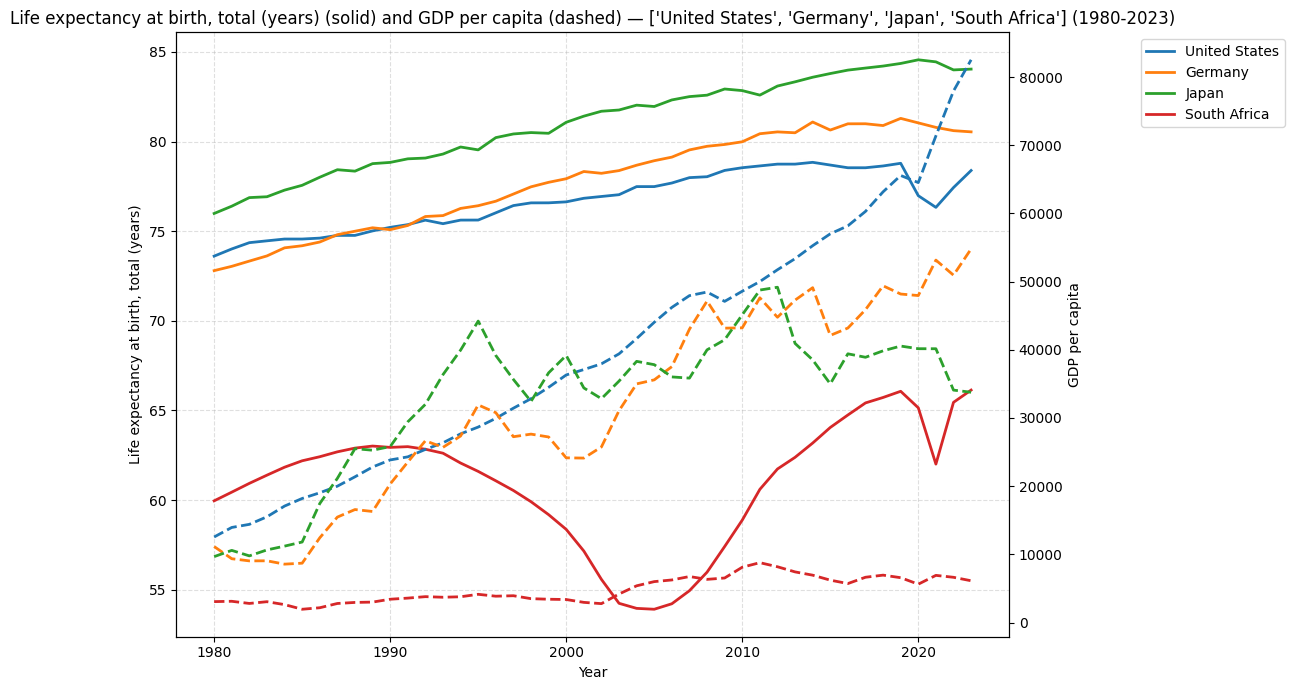

In [924]:
ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita"

plot_two_indicators_long(df, countries, ind1, ind2)


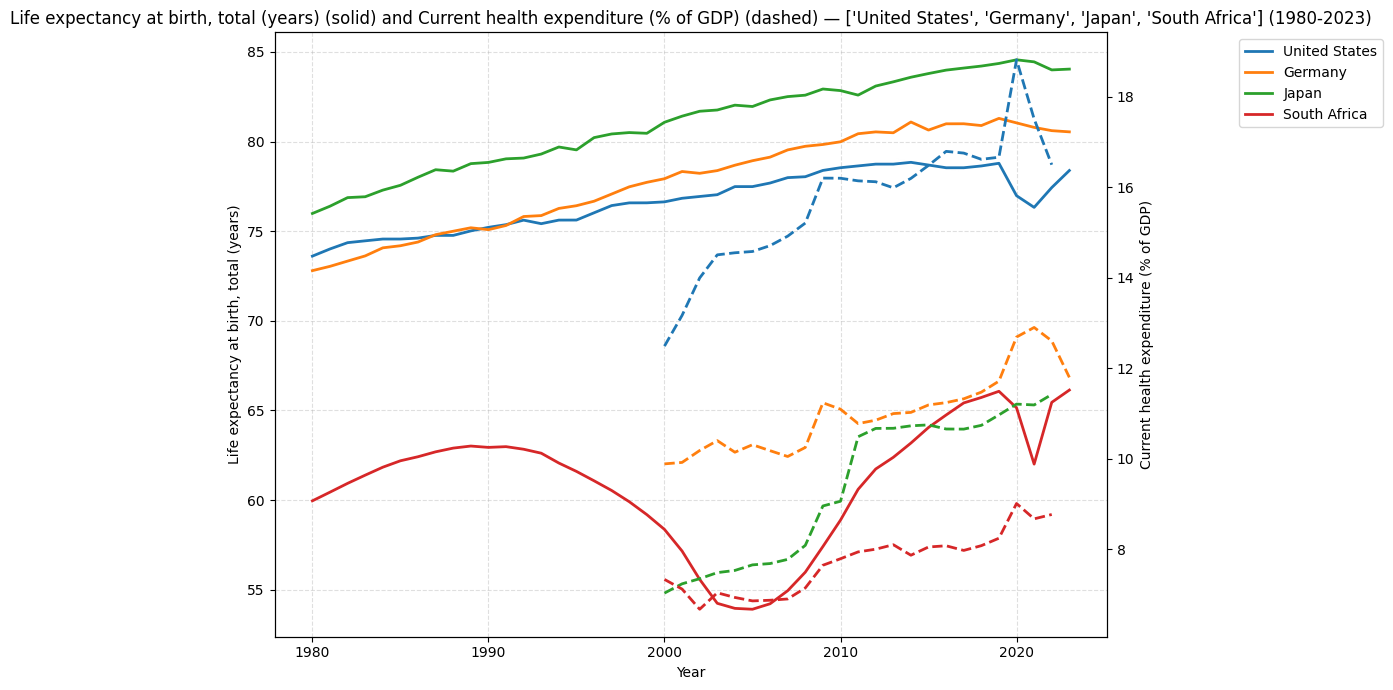

In [925]:
ind1 = "Life expectancy at birth, total (years)"
ind2 = "Current health expenditure (% of GDP)"

plot_two_indicators_long(df, countries, ind1, ind2)

In [926]:
all_countries=['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland']

In [927]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [928]:
df['Indicator Name'].value_counts()

Indicator Name
Urban population (% of total population)                               540
Gini index                                                             540
Life expectancy at birth, total (years)                                540
Current health expenditure (% of GDP)                                  540
Poverty headcount ratio at national poverty lines (% of population)    540
Birth rate, crude (per 1,000 people)                                   540
National savings (% GDP)                                               510
GDP per capita                                                         510
Inflation (CPI, %))                                                    510
Unemployment levels (%)                                                459
Name: count, dtype: int64

In [929]:
df.head(20)

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
5,Germany,"Inflation (CPI, %))",1980,NaN
6,Denmark,GDP per capita,1980,13824.640
7,Germany,GDP per capita,1980,11150.445
8,Denmark,"Inflation (CPI, %))",1980,37.754
9,Denmark,Unemployment levels (%),1980,5.177


In [930]:

import numpy as np


def plot_indicator_bar(df, countries, indicator, year=None):

    # Ensure correct column types
    df["Country Name"] = df["Country Name"].astype(str)
    df["Indicator Name"] = df["Indicator Name"].astype(str)
    df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
    df["Value"] = pd.to_numeric(df["Value"], errors='coerce')

    # Filter for selected countries and indicator
    df_f = df[(df["Country Name"].isin(countries)) & (df["Indicator Name"] == indicator)]

    # If year specified, filter by year
    if year is not None:
        df_f = df_f[df_f["Year"] == year]
    else:
        # Take the most recent year per country
        df_f = df_f.sort_values("Year").groupby("Country Name", as_index=False).tail(1)

    # Get values in the same order as countries
    values = []
    for c in countries:
        val = df_f.loc[df_f["Country Name"] == c, "Value"]
        values.append(val.values[0] if not val.empty else np.nan)  # use NaN if missing

    # Plot
    x = np.arange(len(countries))
    fig, ax = plt.subplots(figsize=(10,6))
    bars = ax.bar(x, values, color='skyblue')

    ax.set_xlabel("Country")
    ax.set_ylabel(indicator)
    ax.set_title(f"{indicator} — {', '.join(countries)}")
    ax.set_xticks(x)
    ax.set_xticklabels(countries)
    ax.grid(True, linestyle='--', alpha=0.4, axis='y')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [931]:
countries_new_europe = ["Germany", "Denmark", "Poland"]
countries_America = ["United States", "Chile", "Costa Rica"]
countries_Asia = ["Japan", "China", "Indonesia"]
countries_Africa = ["South Africa", "Ghana", "Cote d'Ivoire"]

In [932]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [933]:
df["Country Name"].unique()

array(['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana', 'Poland', 'China',
       "Cote d'Ivoire"], dtype=object)

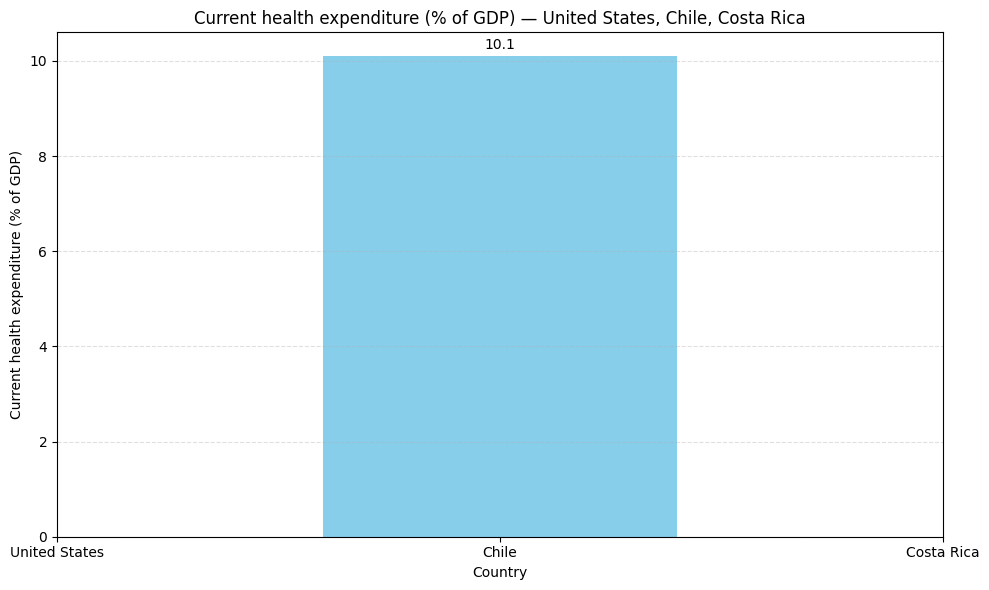

In [934]:
countries_new_europe = ["Germany", "Denmark", "Poland"]
#countries_America = ["USA", "Chile", "Costa Rica"]
#countries_Asia = ["Japan", "China", "Indonesia"]
countries
indicator = "Current health expenditure (% of GDP)"
year = 2023

plot_indicator_bar(df, countries_America, indicator, year)



In [935]:
countries

['United States', 'Germany', 'Japan', 'South Africa']

In [936]:
#PIE CHART for selected Indicator for Various Countries


def pie_chart_different_countries_one_indicator(df, countries, indicator):
    
    # Filter only the countries we want
    df_filter_pie = df[df["Country Name"].isin(countries)].copy()
    
    # Drop rows where indicator is missing / NaN
    #df_filter_pie = df_filter_pie.dropna(subset=[indicator])
    print(df_filter_pie)
    # Extract values
    values = df_filter_pie[df_filter_pie['Indicator Name'] == indicator].Value
    labels = df_filter_pie["Country Name"]
    print(values)
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct="%1.1f%%")
    plt.title(f"{indicator} for Selected Countries")
    plt.show()


In [937]:
[col for col in df.columns if "current health expenditure (% of gdp)" in col.lower()]


[]

In [938]:
['Current Health Expenditure (% of GDP)']


['Current Health Expenditure (% of GDP)']

In [939]:
df['Indicator Name'].value_counts()

Indicator Name
Urban population (% of total population)                               540
Gini index                                                             540
Life expectancy at birth, total (years)                                540
Current health expenditure (% of GDP)                                  540
Poverty headcount ratio at national poverty lines (% of population)    540
Birth rate, crude (per 1,000 people)                                   540
National savings (% GDP)                                               510
GDP per capita                                                         510
Inflation (CPI, %))                                                    510
Unemployment levels (%)                                                459
Name: count, dtype: int64

In [940]:
countries_Europe

['Poland', 'Germany', 'Denmark']

In [941]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5229 non-null   object 
 1   Indicator Name  5229 non-null   object 
 2   Year            5229 non-null   int64  
 3   Value           4250 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 163.5+ KB


In [942]:
!pip3 install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [943]:
import plotly.express as px

def plotly_bar_chart_countries_one_indicator(df, countries, indicator_name, target_year):

    # 1. Clean text columns
    df["Country Name"] = df["Country Name"].astype(str).str.strip()
    df["Indicator Name"] = df["Indicator Name"].astype(str).str.strip()
    
    # 2. Filter by indicator, countries, and year
    df_plot = df[
        (df["Indicator Name"].str.lower() == indicator_name.lower()) &
        (df["Country Name"].isin(countries)) &
        (df["Year"] == target_year)
    ].copy()

    # 4. Create the bar chart
    fig = px.bar(
        df_plot,
        x='Country Name',  # x-axis is the countries from your list
        y='Value',         # y-axis is the value of the indicator
        color='Country Name',
        title=f"{indicator_name} for Selected Countries in {target_year}",
        labels={'Value': f"{indicator_name} (Value)", 'Country Name': 'Country'},
        template="plotly_white"
    )
    
    # 5. Refine layout
    fig.update_layout(
        xaxis_tickangle=-45,
        yaxis_title=f"{indicator_name} (Value)",
        yaxis_range=[0, df_plot['Value'].max() * 1.1]
    )
    
    # 6. Show the chart
    fig.show()


In [944]:
df.columns.value_counts()

Country Name      1
Indicator Name    1
Year              1
Value             1
Name: count, dtype: int64

In [945]:
df['Indicator Name'].unique()

array(['National savings (% GDP)', 'Unemployment levels (%)',
       'GDP per capita', 'Inflation (CPI, %))',
       'Urban population (% of total population)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Current health expenditure (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Birth rate, crude (per 1,000 people)'], dtype=object)

In [946]:
print(df['Year'].unique())
print(df['Indicator Name'].unique())
print(df['Country Name'].unique())


[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030]
['National savings (% GDP)' 'Unemployment levels (%)' 'GDP per capita'
 'Inflation (CPI, %))' 'Urban population (% of total population)'
 'Gini index' 'Life expectancy at birth, total (years)'
 'Current health expenditure (% of GDP)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'Birth rate, crude (per 1,000 people)']
['United States' 'Germany' 'Denmark' 'Japan' 'Indonesia' 'South Africa'
 'Costa Rica' 'Chile' 'Ghana' 'Poland' 'China' "Cote d'Ivoire"]


In [947]:
df["Indicator Name"].unique()

array(['National savings (% GDP)', 'Unemployment levels (%)',
       'GDP per capita', 'Inflation (CPI, %))',
       'Urban population (% of total population)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Current health expenditure (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Birth rate, crude (per 1,000 people)'], dtype=object)

In [948]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [949]:

# Pivot to get indicators as columns
pivot = df.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

# Rename columns:
pivot = pivot.rename(columns={
    "Gini index": "gini",
    "Life expectancy at birth, total (years)": "life_expectancy",
    "Birth rate, crude (per 1,000 people)": "birth_rate"
})




In [950]:
# Compute score
pivot["score"] = (
    0.3 * pivot["gini"] +
    0.5 * pivot["life_expectancy"] +
    0.2 * pivot["birth_rate"]
)

pivot

Indicator Name,Country Name,Year,birth_rate,Current health expenditure (% of GDP),GDP per capita,gini,"Inflation (CPI, %))",life_expectancy,National savings (% GDP),Poverty headcount ratio at national poverty lines (% of population),Unemployment levels (%),Urban population (% of total population),score
0,Chile,1980,23.234,NaN,2598.159,NaN,4.039,69.475,12.366,NaN,11.502,81.243,NaN
1,Chile,1981,22.951,NaN,3025.972,NaN,4.490,69.822,7.870,NaN,10.291,81.778,NaN
2,Chile,1982,22.721,NaN,2219.964,NaN,5.419,70.291,1.467,NaN,19.814,82.226,NaN
3,Chile,1983,22.588,NaN,1774.676,NaN,6.688,70.830,4.082,NaN,20.999,82.359,NaN
4,Chile,1984,22.533,NaN,1698.949,NaN,8.267,71.215,2.296,NaN,17.515,82.492,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,United States,2026,NaN,NaN,92883.466,NaN,333.626,NaN,17.578,NaN,4.119,NaN,NaN
596,United States,2027,NaN,NaN,95960.741,NaN,341.898,NaN,17.724,NaN,3.992,NaN,NaN
597,United States,2028,NaN,NaN,99125.655,NaN,349.436,NaN,17.813,NaN,3.918,NaN,NaN
598,United States,2029,NaN,NaN,102275.842,NaN,357.123,NaN,17.724,NaN,3.824,NaN,NaN


In [951]:
pivot

Indicator Name,Country Name,Year,birth_rate,Current health expenditure (% of GDP),GDP per capita,gini,"Inflation (CPI, %))",life_expectancy,National savings (% GDP),Poverty headcount ratio at national poverty lines (% of population),Unemployment levels (%),Urban population (% of total population),score
0,Chile,1980,23.234,NaN,2598.159,NaN,4.039,69.475,12.366,NaN,11.502,81.243,NaN
1,Chile,1981,22.951,NaN,3025.972,NaN,4.490,69.822,7.870,NaN,10.291,81.778,NaN
2,Chile,1982,22.721,NaN,2219.964,NaN,5.419,70.291,1.467,NaN,19.814,82.226,NaN
3,Chile,1983,22.588,NaN,1774.676,NaN,6.688,70.830,4.082,NaN,20.999,82.359,NaN
4,Chile,1984,22.533,NaN,1698.949,NaN,8.267,71.215,2.296,NaN,17.515,82.492,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,United States,2026,NaN,NaN,92883.466,NaN,333.626,NaN,17.578,NaN,4.119,NaN,NaN
596,United States,2027,NaN,NaN,95960.741,NaN,341.898,NaN,17.724,NaN,3.992,NaN,NaN
597,United States,2028,NaN,NaN,99125.655,NaN,349.436,NaN,17.813,NaN,3.918,NaN,NaN
598,United States,2029,NaN,NaN,102275.842,NaN,357.123,NaN,17.724,NaN,3.824,NaN,NaN


In [952]:
pivot_well_being = pivot[[
    "Country Name",
    "Year",
    "gini",
    "life_expectancy",
    "birth_rate",
    'score'
]]


In [953]:
pivot_well_being.head()

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
0,Chile,1980,NaN,69.475,23.234,NaN
1,Chile,1981,NaN,69.822,22.951,NaN
2,Chile,1982,NaN,70.291,22.721,NaN
3,Chile,1983,NaN,70.830,22.588,NaN
4,Chile,1984,NaN,71.215,22.533,NaN


In [956]:
pivot_well_being = pivot_well_being[pivot_well_being["Year"] >= 2000]


In [957]:
pivot_well_being

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
20,Chile,2000,52.8,77.128,16.322,57.6684
21,Chile,2001,NaN,77.580,15.914,NaN
22,Chile,2002,NaN,77.840,15.249,NaN
23,Chile,2003,51.5,77.884,14.789,57.3498
24,Chile,2004,NaN,78.276,14.415,NaN
...,...,...,...,...,...,...
595,United States,2026,NaN,NaN,NaN,NaN
596,United States,2027,NaN,NaN,NaN,NaN
597,United States,2028,NaN,NaN,NaN,NaN
598,United States,2029,NaN,NaN,NaN,NaN


In [962]:
# List the countries you want to remove
countries_to_drop = ['China', 'Ghana', "Cote d'Ivoire", 'Poland']

# Filter the DataFrame:
# The .isin() method checks if the 'Country Name' is in the list.
# The '~' (tilde) negates the result, keeping only the rows that are NOT in the list.
pivot_well_being = pivot_well_being[~pivot_well_being['Country Name'].isin(countries_to_drop)]

# Now pivot_well_being contains data only for the remaining countries

In [963]:
pivot_well_being.head(20)

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
20,Chile,2000,52.8,77.128,16.322,57.6684
21,Chile,2001,NaN,77.580,15.914,NaN
22,Chile,2002,NaN,77.840,15.249,NaN
23,Chile,2003,51.5,77.884,14.789,57.3498
24,Chile,2004,NaN,78.276,14.415,NaN
25,Chile,2005,NaN,78.459,14.230,NaN
26,Chile,2006,47.7,78.533,13.995,56.3755
27,Chile,2007,NaN,78.652,14.194,NaN
28,Chile,2008,NaN,78.752,14.353,NaN
29,Chile,2009,47.4,78.890,14.363,56.5376


In [966]:
#imputing
pivot_well_being = pivot_well_being.sort_values(["Country Name", "Year"])


In [ ]:
#FFill und BFILL 

pivot_well_being[["gini", "life_expectancy", "birth_rate"]] = (
    pivot_well_being
    .groupby("Country Name")[["gini", "life_expectancy", "birth_rate"]]
    .apply(lambda x: x.interpolate(method="linear").ffill().bfill())
    .reset_index(level=0, drop=True)      # <-- fixes the index mismatch
)


In [970]:
pivot_well_being.head(5)

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
20,Chile,2000,52.800000,77.128,16.322,57.6684
21,Chile,2001,52.366667,77.580,15.914,NaN
22,Chile,2002,51.933333,77.840,15.249,NaN
23,Chile,2003,51.500000,77.884,14.789,57.3498
24,Chile,2004,50.233333,78.276,14.415,NaN


In [974]:
pivot_well_being["score"] = (
    0.3 * pivot_well_being["gini"] +
    0.5 * pivot_well_being["life_expectancy"] +
    0.2 * pivot_well_being["birth_rate"]
)

In [975]:
pivot_well_being.head(5)

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
20,Chile,2000,52.800000,77.128,16.322,57.6684
21,Chile,2001,52.366667,77.580,15.914,57.6828
22,Chile,2002,51.933333,77.840,15.249,57.5498
23,Chile,2003,51.500000,77.884,14.789,57.3498
24,Chile,2004,50.233333,78.276,14.415,57.0910


In [976]:
pivot_well_being[["gini", "life_expectancy", "birth_rate", "score"]].isna().sum()


Indicator Name
gini               0
life_expectancy    0
birth_rate         0
score              0
dtype: int64

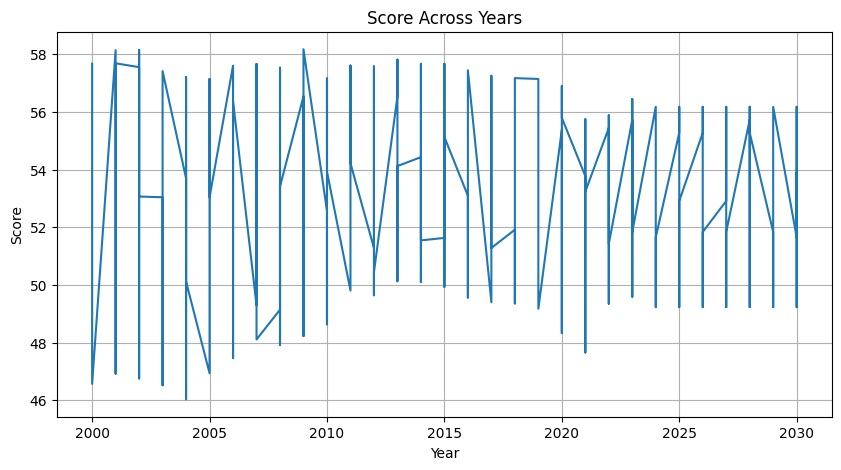

In [977]:
# Sort by year 
pivot_small_sorted = pivot_well_being.sort_values("Year")

plt.figure(figsize=(10, 5))

plt.plot(
    pivot_small_sorted["Year"],
    pivot_small_sorted["score"]
)

plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Score Across Years")
plt.grid(True)

plt.show()

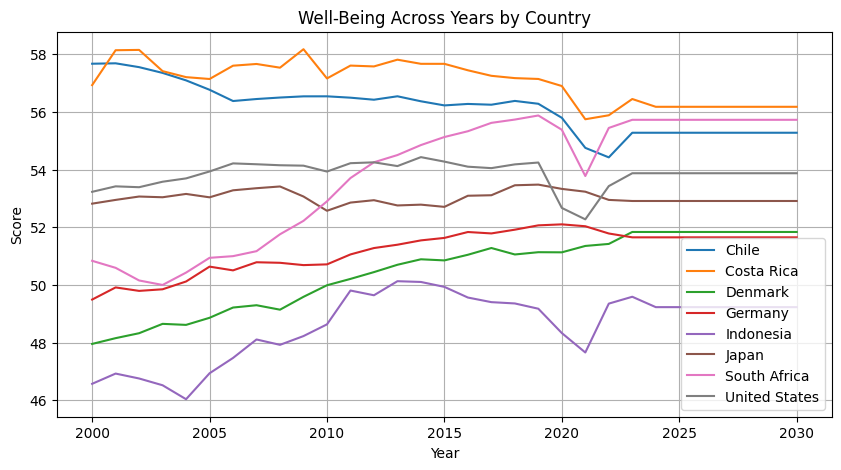

In [979]:
plt.figure(figsize=(10, 5))

for country, group in pivot_small_sorted.groupby("Country Name"):
    plt.plot(group["Year"], group["score"], label=country)

plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Well-Being Across Years by Country")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
pivot_well_being.head(30)


Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score
20,Chile,2000,52.800000,77.128,16.322,57.6684
21,Chile,2001,52.366667,77.580,15.914,57.6828
22,Chile,2002,51.933333,77.840,15.249,57.5498
23,Chile,2003,51.500000,77.884,14.789,57.3498
24,Chile,2004,50.233333,78.276,14.415,57.0910
25,Chile,2005,48.966667,78.459,14.230,56.7655
26,Chile,2006,47.700000,78.533,13.995,56.3755
27,Chile,2007,47.600000,78.652,14.194,56.4448
28,Chile,2008,47.500000,78.752,14.353,56.4966
29,Chile,2009,47.400000,78.890,14.363,56.5376


In [986]:
!pip3 install scikit-learn

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---- 1. Reverse Gini so that higher = better (less inequality) ----
pivot_well_being["gini_rev"] = -pivot_well_being["gini"]

# ---- 2. Select the (reversed) indicators for PCA ----
X = pivot_well_being[["gini_rev", "life_expectancy", "birth_rate"]]

# ---- 3. Standardize (normalize) all indicators ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 4. PCA on normalized values ----
pca = PCA(n_components=1)
pca.fit(X_scaled)

# ---- 5. Extract PC1 loadings ----
loadings = pca.components_[0]

# ---- 6. Convert loadings → absolute, normalized weights ----
weights = np.abs(loadings) / np.sum(np.abs(loadings))

weights_df = pd.DataFrame({
    "indicator": ["gini_rev", "life_expectancy", "birth_rate"],
    "weight": weights
})

print("PCA Weights:")
display(weights_df)

# ---- 7. Compute PCA well-being score ----
pivot_well_being["score_pca"] = (
    weights[0] * X_scaled[:, 0] +
    weights[1] * X_scaled[:, 1] +
    weights[2] * X_scaled[:, 2]
)

pivot_well_being[["Country Name", "Year", "gini_rev", "life_expectancy", "birth_rate", "score_pca"]].head()


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
PCA Weights:


,indicator,weight
0,gini_rev,0.302250
1,life_expectancy,0.346752
2,birth_rate,0.350998


Indicator Name,Country Name,Year,gini_rev,life_expectancy,birth_rate,score_pca
20,Chile,2000,-52.800000,77.128,16.322,-0.059412
21,Chile,2001,-52.366667,77.580,15.914,-0.056055
22,Chile,2002,-51.933333,77.840,15.249,-0.081469
23,Chile,2003,-51.500000,77.884,14.789,-0.102009
24,Chile,2004,-50.233333,78.276,14.415,-0.076004


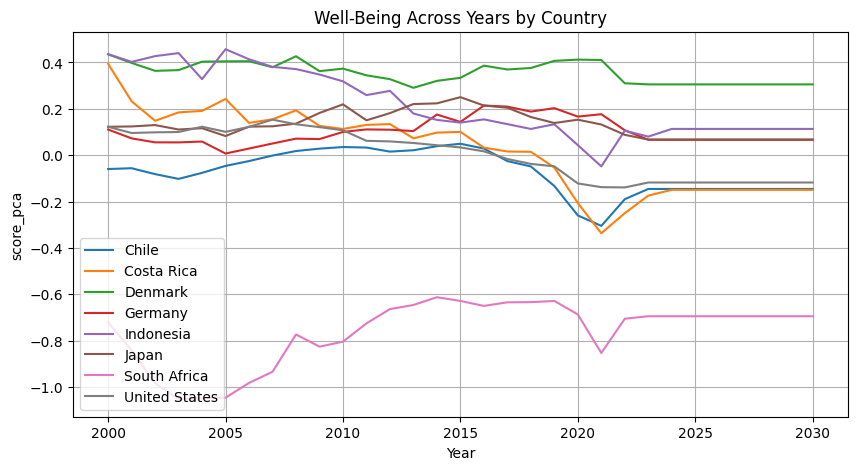

In [990]:
plt.figure(figsize=(10, 5))

for country, group in pivot_well_being.groupby("Country Name"):
    plt.plot(group["Year"], group["score_pca"], label=country)

plt.xlabel("Year")
plt.ylabel("score_pca")
plt.title("Well-Being Across Years by Country")
plt.legend()
plt.grid(True)

plt.show()

In [984]:
pivot_well_being["score_pca_pos"] = (
    pivot_well_being["score_pca"] - pivot_well_being["score_pca"].min()
) / (
    pivot_well_being["score_pca"].max() - pivot_well_being["score_pca"].min()
)


In [ ]:

pivot_well_being

Indicator Name,Country Name,Year,gini,life_expectancy,birth_rate,score,gini_rev,score_pca,score_pca_pos
20,Chile,2000,52.800000,77.128000,16.322,57.668400,-52.800000,-0.059412,0.657753
21,Chile,2001,52.366667,77.580000,15.914,57.682800,-52.366667,-0.056055,0.659977
22,Chile,2002,51.933333,77.840000,15.249,57.549800,-51.933333,-0.081469,0.643142
23,Chile,2003,51.500000,77.884000,14.789,57.349800,-51.500000,-0.102009,0.629535
24,Chile,2004,50.233333,78.276000,14.415,57.091000,-50.233333,-0.076004,0.646762
...,...,...,...,...,...,...,...,...,...
595,United States,2026,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
596,United States,2027,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
597,United States,2028,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188
598,United States,2029,41.800000,78.385366,10.700,53.872683,-41.800000,-0.117630,0.619188


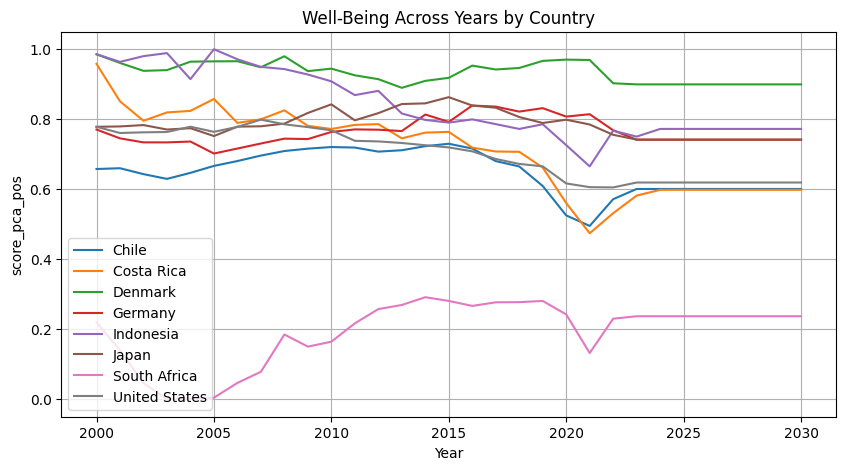

In [991]:
plt.figure(figsize=(10, 5))

for country, group in pivot_well_being.groupby("Country Name"):
    plt.plot(group["Year"], group["score_pca_pos"], label=country)

plt.xlabel("Year")
plt.ylabel("score_pca_pos")
plt.title("Well-Being Across Years by Country")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 4. Recode directionality and standardize to prepare data for principal component analysis
X_econ = df_esi[[‘GDP’, ‘UNEMP’, ‘INFLATION’]].copy()
# 4.1 Invert the unemployment and inflation indicators by multiplying by -1.
X_econ_recoded = X_econ.copy()
X_econ_recoded[‘UNEMP’] = X_econ_recoded[‘UNEMP’] * -1
X_econ_recoded[‘INFLATION’] = X_econ_recoded[‘INFLATION’] * -1
# 4.2 Standardize (Z-score) the recoded data.
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_econ_recoded)
# 5. Apply principal component analysis
# 5.1 Initialize PCA
pca_econ = PCA()
pca_econ.fit(X_standardized)
# 5.2 Transform the standardized data to get the scores for each country-year
PC_scores = pca_esi.transform(X_standardized)
# 5.4 The first Principal Component (PC1) is the Economic Success Indicator
df_econ_working[‘Economic Success (PCA)’] = PC_scores[:, 0]
# 5.5 REVIEW PCA OUTPUT (Crucial for Documentation) ---
print(“--- DataFrame Head with Economic Success (PCA) Score ---“)
print(df_econ_working[[‘Country Name’, ‘Year’, ‘Economic Success (PCA)’]].head())
print(“\n--- PCA Loadings (Weights for ESI) ---“)
# These loadings are the statistically optimal weights for your ESI
loadings = pd.Series(pca_esi.components_[0], index=X_econ_recoded.columns)
print(loadings)
print(“\n--- Explained Variance Ratio ---“)
# This tells you the percentage of total variance the ESI captures.
# The first number in the array is the most important: the percentage explained by PC1.
print(pca_esi.explained_variance_ratio_)






